# Cifar-100 이미지 분류 v1
- Cifar-10과 동일한 모델

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

In [4]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']

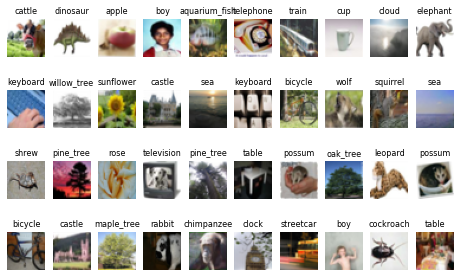

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [6]:
# X data: 0~1 사이의 실수(float32)로 변환
# X_train = X_train.astype(float) / 255. , X_train = X_train / 255. ==> 64bit 실수 
X_train = X_train.astype('float32') / 255.      # default는 64: 0이라는 값을 갖기 위해 64bit가 필요함 => 비효율적이므로, 32bit로 설정한다. 
X_test = X_test.astype(np.float32) / 255.       # 0 ~ 255 => 0 ~ 1 사이의 값일 때 최적의 성능을 구할 수 있다. 

In [7]:
# y_data: one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test) 

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [9]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3) ,activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [10]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model_path = 'best-cifar100-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [12]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=32, verbose=2,
    callbacks=[checkpoint, early_stop]            
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 4.08671, saving model to best-cifar100-v1.h5
1250/1250 - 22s - loss: 4.3625 - accuracy: 0.0387 - val_loss: 4.0867 - val_accuracy: 0.0881 - 22s/epoch - 17ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 4.08671 to 3.70340, saving model to best-cifar100-v1.h5
1250/1250 - 7s - loss: 3.9580 - accuracy: 0.0945 - val_loss: 3.7034 - val_accuracy: 0.1458 - 7s/epoch - 5ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 3.70340 to 3.51090, saving model to best-cifar100-v1.h5
1250/1250 - 6s - loss: 3.6979 - accuracy: 0.1385 - val_loss: 3.5109 - val_accuracy: 0.1801 - 6s/epoch - 5ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 3.51090 to 3.38258, saving model to best-cifar100-v1.h5
1250/1250 - 7s - loss: 3.5213 - accuracy: 0.1646 - val_loss: 3.3826 - val_accuracy: 0.1986 - 7s/epoch - 5ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 3.38258 to 3.21771, saving model to best-cifar100-v1.h5
1250/1250 - 6s - loss: 3

In [13]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.1173 - accuracy: 0.4492


[2.1173436641693115, 0.44920000433921814]

- 학습과정 시각화

In [14]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

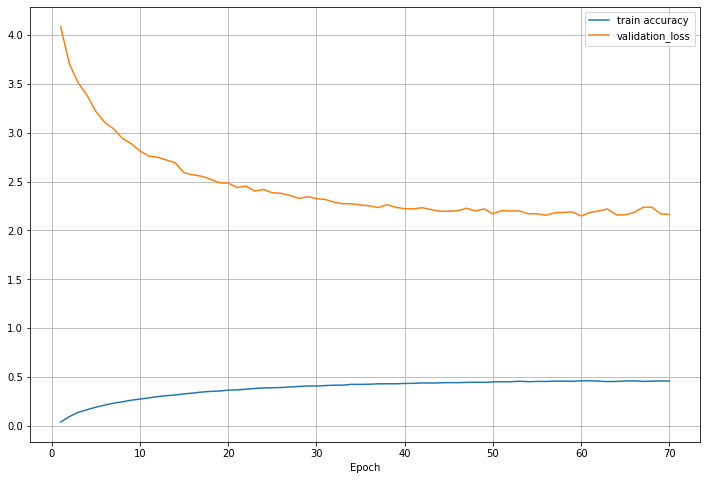

In [15]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()